# Shareability of demand patterns
---

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('rematch_1_40.csv')
df[r'$\sigma^2$'] = df.index
df['occupancy'] = df.PassHourTrav/df.VehHourTrav
df['shared'] = df.PAIRS
df['private'] = df.SINGLE
df = df.sort_index()

In [7]:
df['higher degree rides'] = (df.TRIPLES**(1.5)).rolling(window=3).mean().fillna(method='bfill')


In [10]:
plt.rcParams['figure.figsize'] = [12, 4]
#import seaborn as sns
#colors = sns.color_palette("muted")

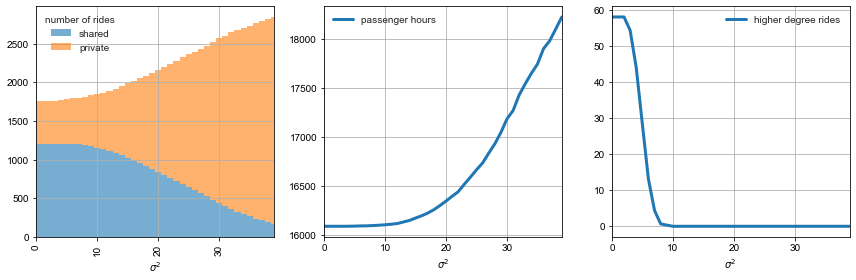

In [11]:
plt.rcParams['figure.figsize'] = [12, 4]
fig, axes = plt.subplots(1,3)
plt.rcParams["font.family"] = "Times"
plt.style.use('seaborn-whitegrid')
df.plot.bar(x=r'$\sigma^2$', y = ['shared', 'private',], stacked = True, alpha = 0.6, width = 1, ax = axes[0])
xticks = axes[0].xaxis.get_major_ticks()
for i in range(len(xticks)):
    if (i) % 10 != 0:
        xticks[i].set_visible(False)
#axes[0].set_ylabel('number of rides')
axes[0].set_xlim((0,39))
axes[0].legend(title="number of rides")
a = 3
df['passenger hours'] = df.PassUtility
df.plot(x=r'$\sigma^2$', y = 'passenger hours', ax = axes[1], lw = 3)

df.plot(x=r'$\sigma^2$', y = 'higher degree rides', ax = axes[2], lw = 3)
axes[1].set_xlim((0,39))
axes[2].set_xlim((0,39))
plt.tight_layout() 
plt.savefig('fig10.png')